# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gpd.read_file?

In [3]:
# Read shapefile
ph = gpd.read_file('/Users/Nico/Desktop/DSDATA/SHP/' + '/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.089197159, 3.7627797585, 21.894300891500002)

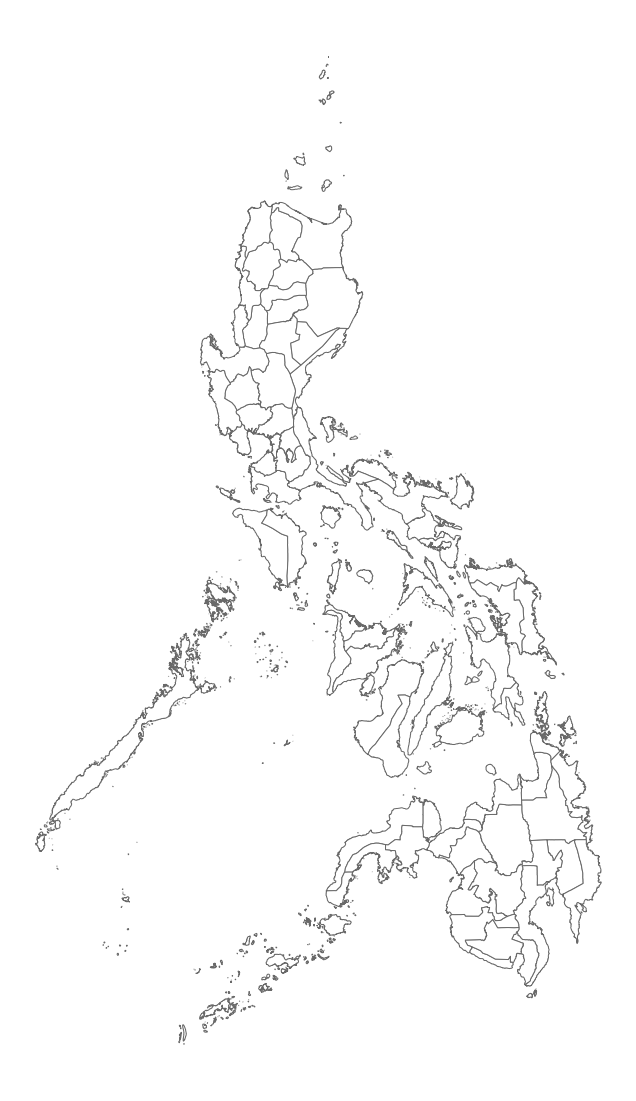

In [10]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [11]:
# Read GeoJSON file
healthsites = gpd.read_file('/Users/Nico/Desktop/DSDATA/' + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [29]:
bulacan = ph[ph.NAME_1 == "Bulacan"]
mm = ph[ph.NAME_1 == "Metropolitan Manila"]

In [30]:
bulacan_amenities = gpd.sjoin(healthsites, bulacan, op='within')
mm_amenities = gpd.sjoin(healthsites, mm, op='within')

In [32]:
mm_amenities.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
12,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
15,796284976,way,9.0,,dentist,,,,,84795442.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
18,1337361512,node,12.0,,pharmacy,,,,,18298881.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
21,7418383285,node,9.0,,pharmacy,,,,,83760358.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
26,4217096997,node,18.0,,pharmacy,,Shaw Boulevard,,,97336875.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
27,6556682427,node,12.0,,pharmacy,,J.P. Rizal,,,71387128.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
31,3074418279,node,9.0,,pharmacy,,,,,25405354.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
37,5920487685,node,18.0,,clinic,,Quirino Highway,,,83885861.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM
41,255989056,way,18.0,,pharmacy,,,,,43959231.0,...,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [21]:
bulacan_amenities.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
10,164577919,way,9.0,,hospital,,,,,11669251.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
58,397040242,way,21.0,,hospital,,Do単a Remedios Trinidad Highway,,,50131022.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
139,3048350555,node,9.0,,pharmacy,,,,,25086604.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
171,3056949510,node,9.0,,hospital,,,,,25198549.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU
194,2573040752,node,9.0,,pharmacy,,,,,19359776.0,...,PHL,Philippines,PHL.17_1,Bulacan,None,None,Lalawigan|Probinsya,Province,314,PH.BU


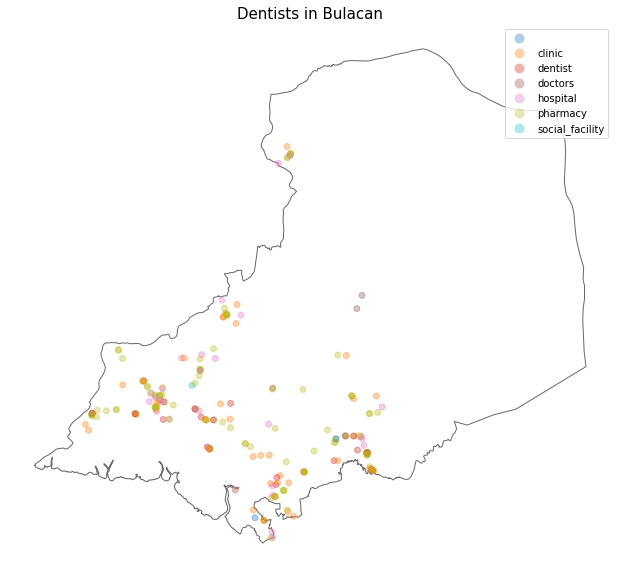

In [44]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenities.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentists in Bulacan', fontsize=15)
ax.axis('off');

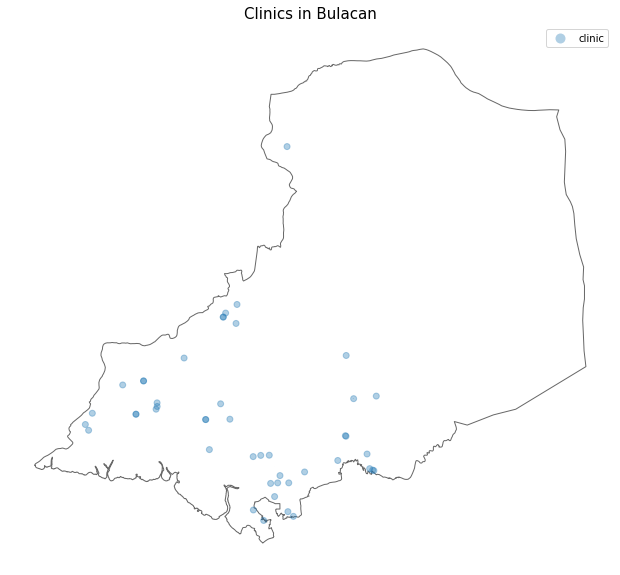

In [42]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenity= bulacan_amenities[bulacan_amenities.amenity=="clinic"]
bulacan_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinics in Bulacan', fontsize=15)
ax.axis('off');

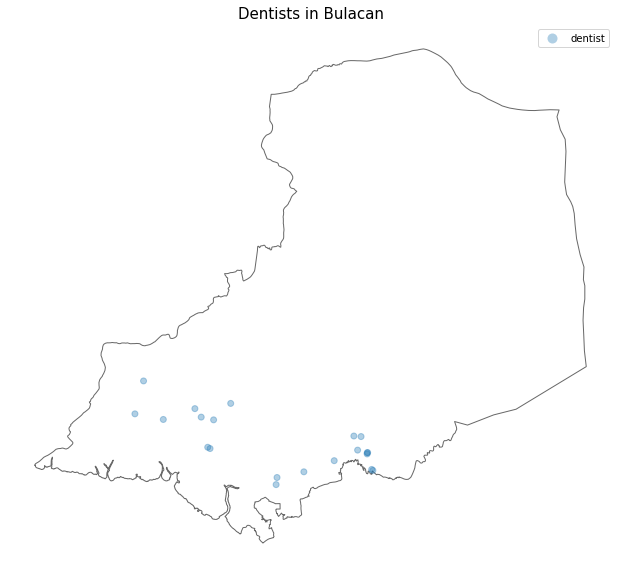

In [63]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenity= bulacan_amenities[bulacan_amenities.amenity=="dentist"]
bulacan_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentists in Bulacan', fontsize=15)
ax.axis('off');

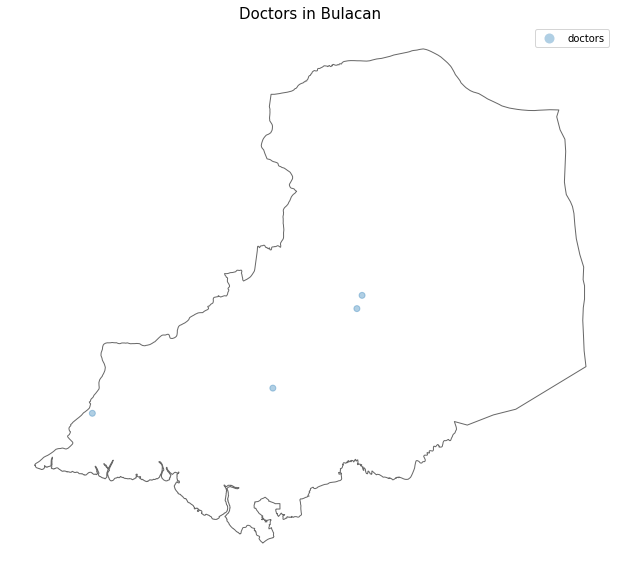

In [45]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenity= bulacan_amenities[bulacan_amenities.amenity=="doctors"]
bulacan_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctors in Bulacan', fontsize=15)
ax.axis('off');

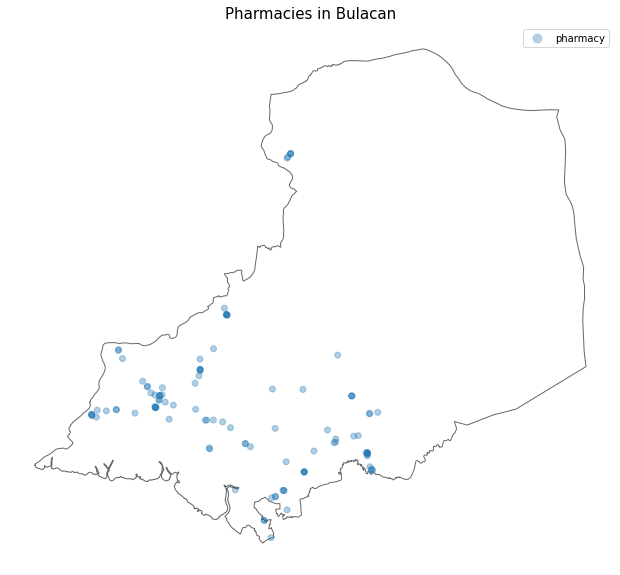

In [46]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenity= bulacan_amenities[bulacan_amenities.amenity=="pharmacy"]
bulacan_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Bulacan', fontsize=15)
ax.axis('off');

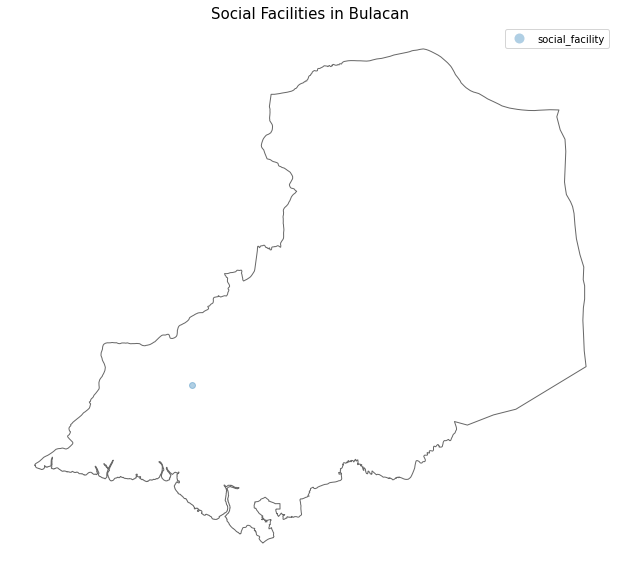

In [47]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
bulacan.plot(ax=ax, color='white', edgecolor='dimgray')
bulacan_amenity= bulacan_amenities[bulacan_amenities.amenity=="social_facility"]
bulacan_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Social Facilities in Bulacan', fontsize=15)
ax.axis('off');

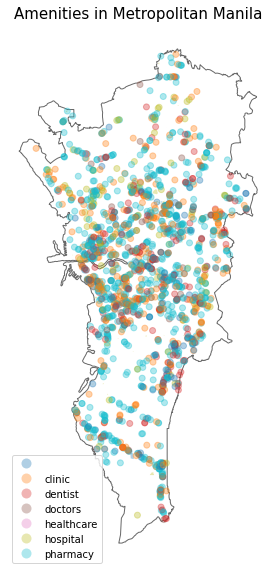

In [49]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenities.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Amenities in Metropolitan Manila', fontsize=15)
ax.axis('off');

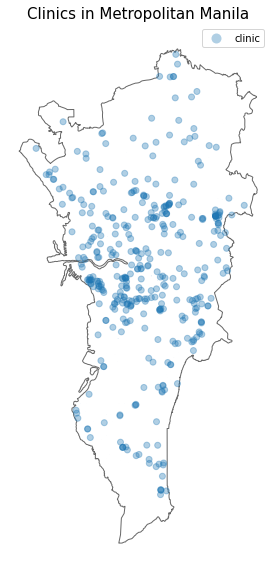

In [52]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "clinic"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Clinics in Metropolitan Manila', fontsize=15)
ax.axis('off');

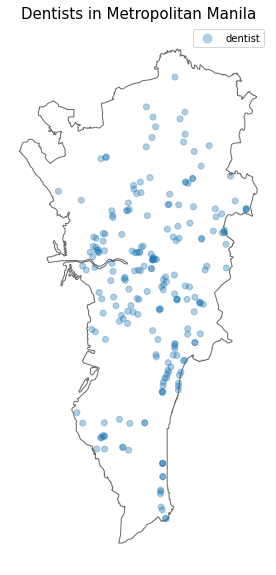

In [53]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "dentist"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Dentists in Metropolitan Manila', fontsize=15)
ax.axis('off');

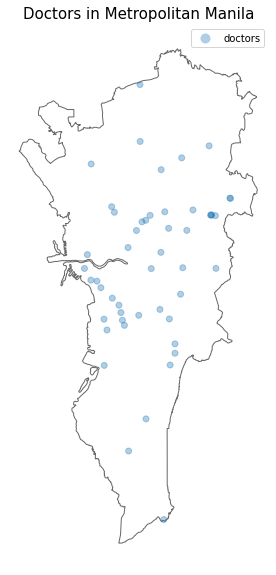

In [54]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "doctors"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Doctors in Metropolitan Manila', fontsize=15)
ax.axis('off');

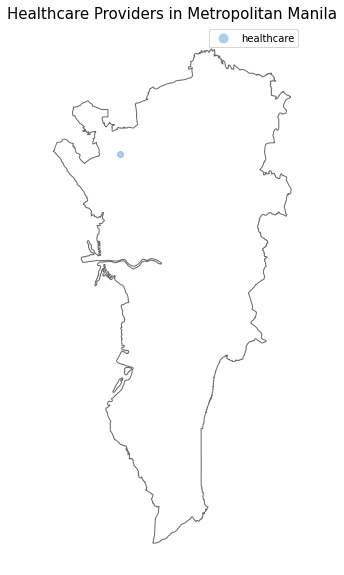

In [55]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "healthcare"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Healthcare Providers in Metropolitan Manila', fontsize=15)
ax.axis('off');

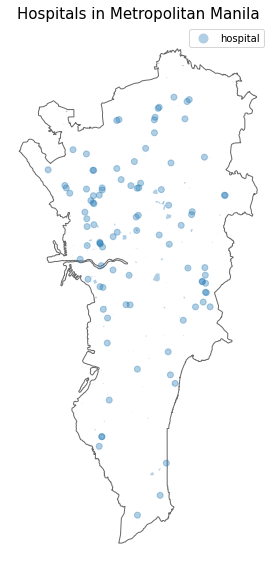

In [56]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "hospital"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Hospitals in Metropolitan Manila', fontsize=15)
ax.axis('off');

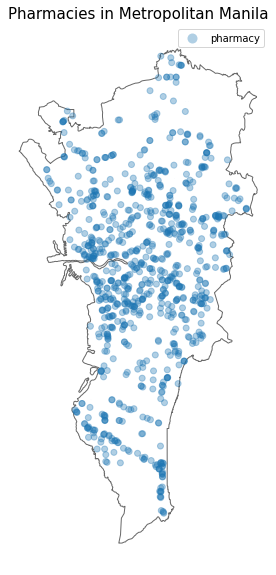

In [57]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_amenity = mm_amenities[mm_amenities.amenity == "pharmacy"]
mm_amenity.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Metropolitan Manila', fontsize=15)
ax.axis('off');